# Support Vector Machine ATLAS DATA

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
#load in data
data=pd.read_csv('ATLAS-data.csv', delimiter=',',header=None)
labels=pd.read_csv('ATLAS-labels.csv', delimiter=',',header=None)
print(data.shape)
print(data.head())
print(data.info())
print(data.describe())

(10000, 30)
        0       1        2        3      4        5      6      7       8   \
0  243.128  96.455  158.618   90.253  0.693   56.238  1.581  3.615  13.597   
1  139.751  74.028  111.619   44.266  2.119  104.723 -0.498  2.533   9.437   
2  116.217  73.136   59.239  101.850  0.625   85.539  2.979  1.922  28.049   
3   64.544   0.099   28.945  341.418  2.390  358.936 -1.181  0.714  35.293   
4   32.281  67.393   26.006   29.088  1.330  108.191 -0.362  0.846  48.389   

        9   ...     20       21   22       23     24     25      26     27  \
0  264.586  ...  2.121  376.410  3.0   46.248 -0.958 -0.444  42.759 -1.651   
1  168.638  ...  0.447  252.698  2.0   36.798  0.269 -1.254  31.816 -1.849   
2  202.636  ...  1.816  271.485  2.0   82.453  2.066 -1.210  58.216  1.442   
3  508.349  ... -2.409  470.806  3.0  331.152 -1.693  0.615  41.742  0.697   
4  152.087  ... -1.421  244.220  2.0   48.198  0.949  1.517  40.382 -0.382   

      28       29  
0 -1.445  157.638  
1  0.664  

In [3]:
#Check for missign values
total=data.isnull().sum().sort_values(ascending=False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])


,Total,Percent
29,0,0.0
28,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0


In [4]:
#Drop category labels and gender labels
X=data
y=labels.values.ravel()

In [5]:
#Normalise the data between 0 and 1
sc=StandardScaler()
X_scaled_data = sc.fit_transform(data)

In [6]:
#Sample data to work through the probelm with
sample_data=X_scaled_data[0:500]
sample_labels=y[0:500]

In [7]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(sample_data, sample_labels,test_size = 0.3, random_state=42)   #scale the test data as well


In [8]:
#Initiate the classifier
clf = SVC(kernel='linear', verbose=True) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


[LibSVM]

In [9]:
#Print out the statistics from the classifier
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

So, Our accuracy Score is: 0.6867
[[65 18]
 [29 38]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        83
           1       0.68      0.57      0.62        67

    accuracy                           0.69       150
   macro avg       0.69      0.68      0.68       150
weighted avg       0.69      0.69      0.68       150



0.6751483546124797


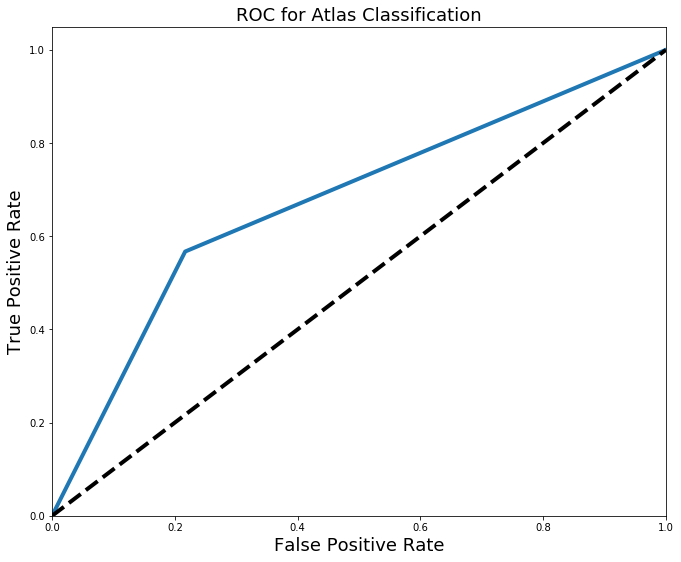

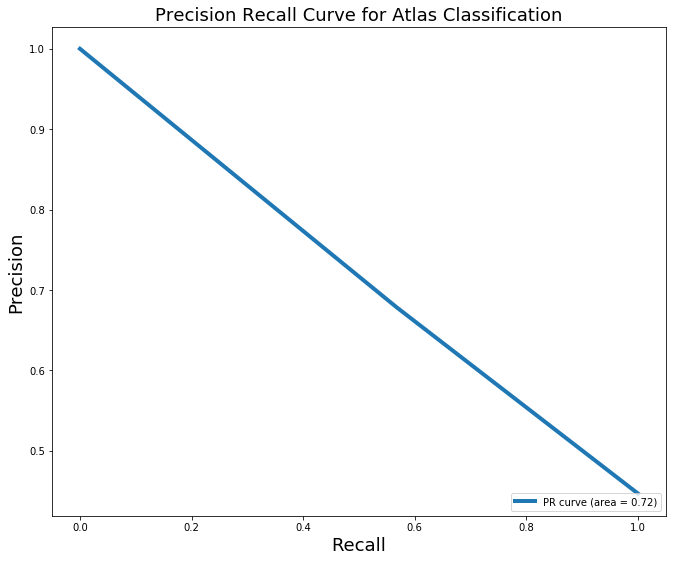

In [10]:
#Validating the fit
#AUC & ROC Curve
FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas Classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas Classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()


In [11]:
#Now with cross validation 10 fold
cv = StratifiedKFold(n_splits = 10, random_state = 42 )
accuracies = cross_val_score(clf, X_train,y_train, cv  = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross-Validation accuracy scores:[0.63888889 0.62857143 0.65714286 0.74285714 0.74285714 0.74285714
 0.62857143 0.85714286 0.77142857 0.76470588]
Mean Cross-Validation accuracy score: 0.7175


In [9]:
#initiate grid search with optimum parameters 
cv = StratifiedKFold(n_splits=5, random_state=42)
paramgrid = {"kernel" :["linear", "rbf", "poly"],"C":[0.1,1,10,100],"gamma":[1e-8,1e-4,1],"degree" : [0, 1, 2, 3]}
model=SVC()
model_random = RandomizedSearchCV(model,paramgrid,cv=cv,iid=False,verbose=10)
model_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=linear, gamma=1e-12, degree=6, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=6, C=1, score=0.620, total=   0.0s
[CV] kernel=linear, gamma=1e-12, degree=6, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=6, C=1, score=0.700, total=   0.0s
[CV] kernel=linear, gamma=1e-12, degree=6, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=6, C=1, score=0.743, total=   0.0s
[CV] kernel=linear, gamma=1e-12, degree=6, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=6, C=1, score=0.700, total=   0.0s
[CV] kernel=linear, gamma=1e-12, degree=6, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=6, C=1, score=0.696, total=   0.0s
[CV] kernel=poly, gamma=1e-08, degree=0, C=1 .........................
[CV]  kernel=poly, gamma=1e-08, degree=0, C=1, score=0.577, total=   0.0s
[CV] kernel=poly, gamma=1e-08, degree=0, C=1 ..............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  kernel=linear, gamma=1e-12, degree=0, C=1, score=0.743, total=   0.0s
[CV] kernel=linear, gamma=1e-12, degree=0, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=0, C=1, score=0.700, total=   0.0s
[CV] kernel=linear, gamma=1e-12, degree=0, C=1 .......................
[CV]  kernel=linear, gamma=1e-12, degree=0, C=1, score=0.696, total=   0.0s
[CV] kernel=linear, gamma=1e-08, degree=5, C=1000 ....................
[CV]  kernel=linear, gamma=1e-08, degree=5, C=1000, score=0.620, total=  41.1s
[CV] kernel=linear, gamma=1e-08, degree=5, C=1000 ....................
[CV]  kernel=linear, gamma=1e-08, degree=5, C=1000, score=0.729, total=  17.0s
[CV] kernel=linear, gamma=1e-08, degree=5, C=1000 ....................
[CV]  kernel=linear, gamma=1e-08, degree=5, C=1000, score=0.700, total=   9.8s
[CV] kernel=linear, gamma=1e-08, degree=5, C=1000 ....................
[CV]  kernel=linear, gamma=1e-08, degree=5, C=1000, score=0.729, total=   5.6s
[CV] kernel=linear, gamma=1e-0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


In [10]:
print(model_random.best_params_)
print(model_random.best_score_)

{'kernel': 'linear', 'gamma': 1e-12, 'degree': 6, 'C': 1}
0.6916455253258682


In [11]:
#initiate grid search with optimum parameters 
cv = StratifiedKFold(n_splits=5, random_state=42)
paramgrid = {"C":np.arange(1,10),"gamma":[1e-12,1e-8,1e-4]}
model=SVC(kernel='linear',degree=6)
model_grid = GridSearchCV(model,paramgrid,cv=cv,iid=False,verbose=10)
model_grid.fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

svc_ran_grid = model_grid.best_estimator_
svc_ran_grid.score(X_test,y_test)
y_pred = svc_ran_grid.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] C=1, gamma=1e-12 ................................................
[CV] .................... C=1, gamma=1e-12, score=0.620, total=   0.0s
[CV] C=1, gamma=1e-12 ................................................
[CV] .................... C=1, gamma=1e-12, score=0.700, total=   0.0s
[CV] C=1, gamma=1e-12 ................................................
[CV] .................... C=1, gamma=1e-12, score=0.743, total=   0.0s
[CV] C=1, gamma=1e-12 ................................................
[CV] .................... C=1, gamma=1e-12, score=0.700, total=   0.0s
[CV] C=1, gamma=1e-12 ................................................
[CV] .................... C=1, gamma=1e-12, score=0.696, total=   0.0s
[CV] C=1, gamma=1e-08 ................................................
[CV] .................... C=1, gamma=1e-08, score=0.620, total=   0.0s
[CV] C=1, gamma=1e-08 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


[CV] .................... C=1, gamma=1e-08, score=0.700, total=   0.0s
[CV] C=1, gamma=1e-08 ................................................
[CV] .................... C=1, gamma=1e-08, score=0.743, total=   0.0s
[CV] C=1, gamma=1e-08 ................................................
[CV] .................... C=1, gamma=1e-08, score=0.700, total=   0.0s
[CV] C=1, gamma=1e-08 ................................................
[CV] .................... C=1, gamma=1e-08, score=0.696, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.620, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.700, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.743, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.700, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.696, total=   0.0s
[CV] C=2, gamma=1e-12 ................................................
[CV] .................... C=2, gamma=1e-12, score=0.634, total=   0.0s
[CV] C=2, gamma=1e-12 ................................................
[CV] .................... C=2, gamma=1e-12, score=0.714, total=   0.0s
[CV] C=2, gamma=1e-12 ................................................
[CV] .................... C=2, gamma=1e-12, score=0.714, total=   0.1s
[CV] C=2, gamma=1e-12 ................................................
[CV] .................... C=2, gamma=1e-12, score=0.714, total=   0.0s
[CV] C=2, gamma=1e-12 ................................................
[CV] .................... C=2, gamma=1e-12, score=0.681, total=   0.0s
[CV] C=2, gamma=1e-08 ................................................
[CV] .

[CV] ................... C=5, gamma=0.0001, score=0.743, total=   0.1s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.729, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.714, total=   0.1s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ................... C=5, gamma=0.0001, score=0.681, total=   0.0s
[CV] C=6, gamma=1e-12 ................................................
[CV] .................... C=6, gamma=1e-12, score=0.634, total=   0.1s
[CV] C=6, gamma=1e-12 ................................................
[CV] .................... C=6, gamma=1e-12, score=0.743, total=   0.4s
[CV] C=6, gamma=1e-12 ................................................
[CV] .................... C=6, gamma=1e-12, score=0.729, total=   0.1s
[CV] C=6, gamma=1e-12 ................................................
[CV] .

[CV] ................... C=9, gamma=0.0001, score=0.634, total=   0.2s
[CV] C=9, gamma=0.0001 ...............................................
[CV] ................... C=9, gamma=0.0001, score=0.743, total=   0.5s
[CV] C=9, gamma=0.0001 ...............................................
[CV] ................... C=9, gamma=0.0001, score=0.743, total=   0.2s
[CV] C=9, gamma=0.0001 ...............................................
[CV] ................... C=9, gamma=0.0001, score=0.729, total=   0.2s
[CV] C=9, gamma=0.0001 ...............................................
[CV] ................... C=9, gamma=0.0001, score=0.681, total=   0.1s
{'C': 6, 'gamma': 1e-12}
0.7058909981628905


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.1s finished


In [12]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3, random_state=42)   #scale the test data as well


In [13]:
#Initiate the classifier
clf = SVC(kernel='linear', C=6,gamma=1e-12,degree=6,verbose=True) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


[LibSVM]

So, Our accuracy Score is: 0.7193
[[1219  322]
 [ 520  939]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1541
           1       0.74      0.64      0.69      1459

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000

0.7173181385737523


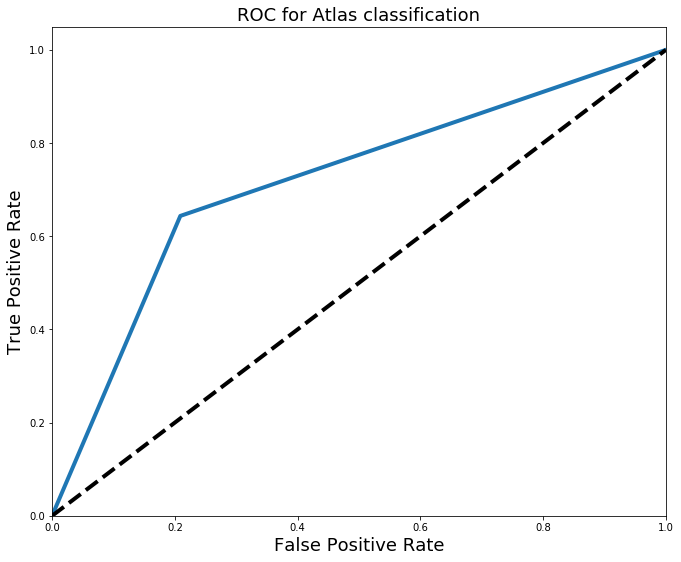

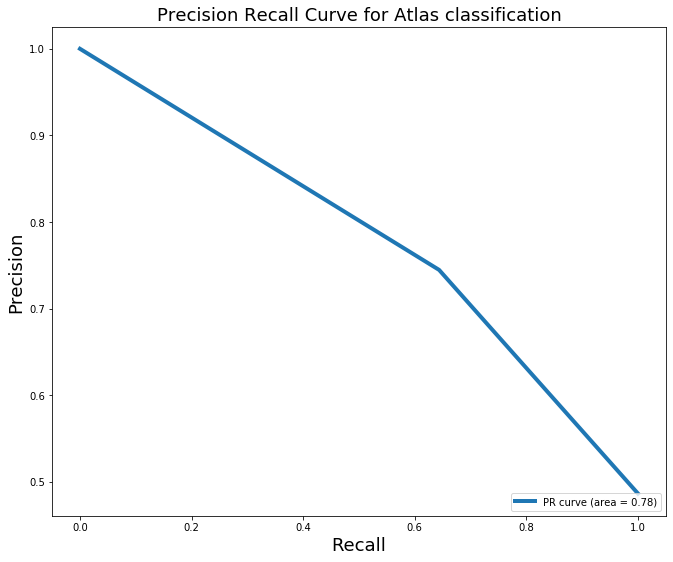

In [14]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Bagging and Boosting

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [19]:
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .4, random_state = 42 )
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = RandomForestClassifier()
estimators.append(('cart', model2))
model3 = SVC(kernel='linear', C=6,gamma=1e-12,degree=6,verbose=True)
estimators.append(('svm', model3))

In [20]:
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='hard')
results = ensemble.fit(X_train,y_train)
ensemble.score(X_test,y_test)

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

0.7263333333333334

In [21]:
accuracies = cross_val_score(ensemble, X_train,y_train, cv  = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[LibSVM]Cross-Validation accuracy scores:[0.74214286 0.73464286 0.74321429 0.72607143 0.74035714 0.73357143
 0.74321429 0.73678571 0.74714286 0.74      ]
Mean Cross-Validation accuracy score: 0.73871


In [22]:
y_pred = ensemble.predict(X_test)

So, Our accuracy Score is: 0.7263
[[1220  321]
 [ 500  959]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1541
           1       0.75      0.66      0.70      1459

    accuracy                           0.73      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.73      0.72      3000

0.7244966128027206


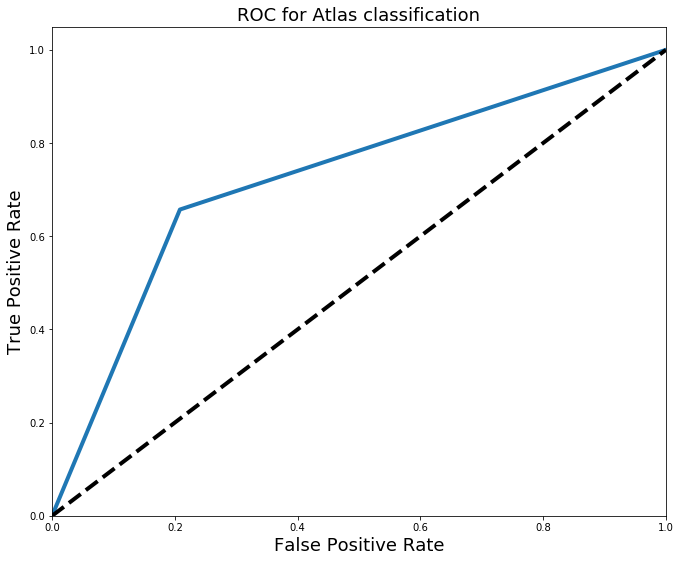

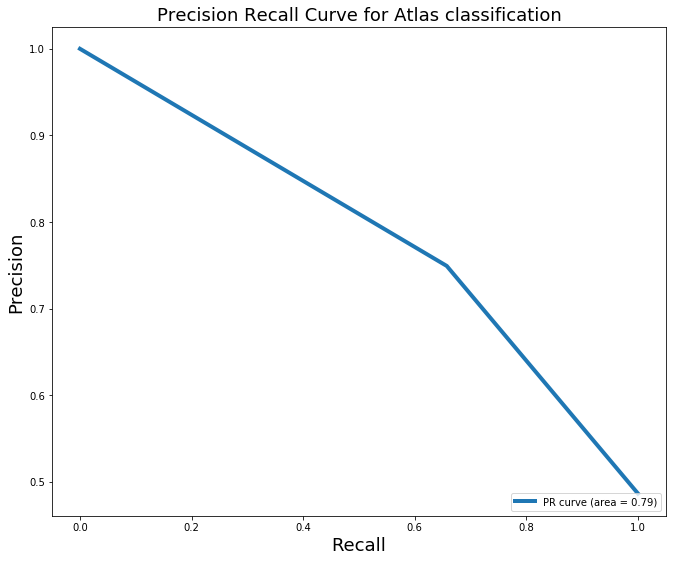

In [23]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()